TF 표현

<Axes: >

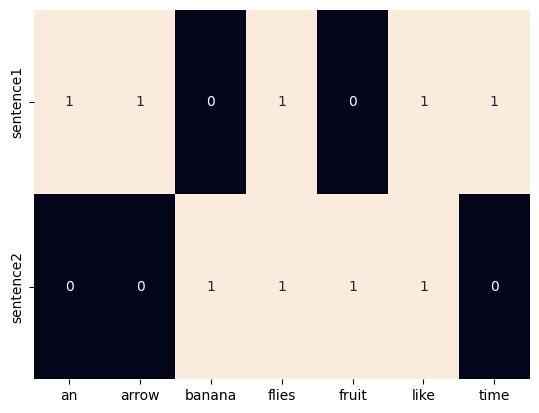

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = [
    "Time flies like an arrow.", 
    "Fruit flies like a banana."    
]

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names_out()
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab, 
            yticklabels=['sentence1', 'sentence2'])

TF-IDF 표현      
* $IDF(w) = \log(N/n_w)$, $n_w$는 단어 $w$를 포함하는 문서의 개수, $N$은 전체 문서의 개수
* TF-IDF는 TF와 IDF를 곱한 것 

<Axes: >

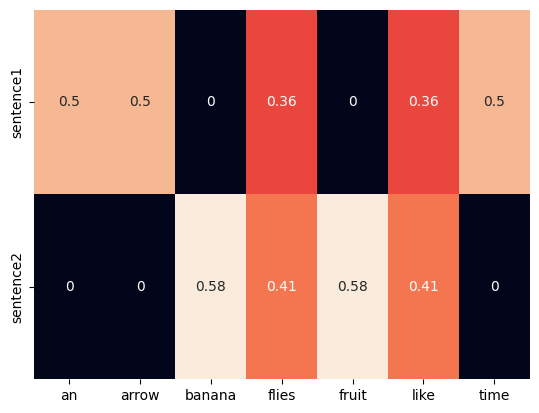

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, 
            xticklabels=vocab, 
            yticklabels=['sentence1', 'sentence2'])

텐서 만들기

In [3]:
def describe(x) :
    print("타입: {}".format(x.type()))
    print("크기: {}".format(x.shape))
    print("값: \n{}".format(x))
    
import torch
# 텐서 랜덤하게 초기화
print('# 랜덤하게 초기화', '--' * 20)
describe(torch.Tensor(2,3))  
print('# 균등분포 샘플링', '--' * 20)
describe(torch.rand(2,3))
print('# 표준정규분포 샘플링', '--' * 20)
describe(torch.randn(2,3))
print('# 0 값으로 채움', '--' * 20)
describe(torch.zeros(2,3))
print('# 1 값으로 채움', '--' * 20)
describe(torch.ones(2,3))
print('# 특정값으로 채움', '--' * 20)
describe(torch.zeros(2,3).fill_(5))

# 랜덤하게 초기화 ----------------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-4.6591e-10,  1.5204e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])
# 균등분포 샘플링 ----------------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.7931, 0.2707, 0.3281],
        [0.3782, 0.2887, 0.2138]])
# 표준정규분포 샘플링 ----------------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.1012, -0.9272, -1.0380],
        [-1.8166,  0.9916, -0.1241]])
# 0 값으로 채움 ----------------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
# 1 값으로 채움 ----------------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
# 특정값으로 채움 ----------------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [7]:
# 리스트, 넘파이로 텐서 만들기
print("# 리스트", "-" * 30)
x = torch.Tensor([[1, 2, 3], 
                  [4, 5, 6]])
describe(x)
import numpy as np 
npy = np.random.rand(2,3)
print("# 넘파이", "-" * 30)
describe(torch.from_numpy(npy))

# 리스트 ------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
# 넘파이 ------------------------------
타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.5398, 0.0695, 0.6796],
        [0.5669, 0.3253, 0.8775]], dtype=torch.float64)


In [9]:
# 텐서 타입과 크기
x = torch.FloatTensor([[1, 2, 3], 
                       [4, 5, 6]])
describe(x)

x = x.long()
describe(x)

x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype = torch.int64)
describe(x)

x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]])
describe(x)

x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


텐서 연산

In [18]:
# 덧셈
x = torch.randn(2, 3)
describe(x)
describe(torch.add(x, x))
describe(x + x)

# 차원
x = torch.arange(6)
describe(x)
describe(x.view(2,3))
x = x.view(2, 3)
describe(torch.sum(x, dim = 0))
describe(torch.sum(x, dim = 1))
describe(torch.transpose(x, 0, 1))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 0.7658, -0.6230, -0.6496],
        [ 0.7281,  0.3829, -0.0801]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 1.5316, -1.2460, -1.2992],
        [ 1.4563,  0.7657, -0.1601]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 1.5316, -1.2460, -1.2992],
        [ 1.4563,  0.7657, -0.1601]])
타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])
타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


인덱싱, 슬라이싱, 연결

In [20]:
import torch
x = torch.arange(6).view(2, 3)
describe(x)
describe(x[:1, :2])
describe(x[0, 1])

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])
타입: torch.LongTensor
크기: torch.Size([])
값: 
1


In [28]:
indices = torch.LongTensor([0, 2])  # 연속적이지 않은 인덱싱
describe(torch.index_select(x, dim=1, index = indices))

indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index= indices))

row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])


In [32]:
x = torch.arange(6).view(2, 3)
describe(x)
describe(torch.cat([x, x], dim = 0))
describe(torch.cat([x, x], dim = 1))
describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([4, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 6])
값: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [37]:
x1 = torch.arange(6).view(2, 3)
x1 = x1.float()
describe(x1)

x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

describe(torch.mm(x1, x2))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[ 3.,  6.],
        [12., 24.]])


텐서와 계산 그래프
* 텐서의 requires_grad 불리언 매개변수를 True로 지정하면 gradient 기반 학습에 필요한 손실함수와 텐서의 gradient를 기록하는 부가 연산을 활성화 함.
* 파이토치가 정방향 계산의 값을 기록. 계산이 끝나면 스칼라값 하나를 사용해 역방향 계산을 수행. 역방향 계산은 손실 함수의 평가 결과로 얻은 텐서에서 backward() 매서드를 호출해 시작. 역방향 계산은 
정방향 계산에 참여한 텐서 객체에 대한 gradient 값을 계산함.
* 일반적으로 gradient 는 함수 입력에 대한 함수 출력의 기울기를 나타내는 값.

In [54]:
import torch 
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

z = y.mean()
describe(z)
z.backward()
print(x.grad is None)
print(x.grad)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True
타입: torch.FloatTensor
크기: torch.Size([])
값: 
21.0
False
tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])


CUDA 텐서
* cuda api는 nvidia에서 만들었고 nvidia gpu에서만 사용됨. 
* torch.device()로 장치 이름을 가져와, .to(device) 메서드를 사용해 향후 초기화되는 모든 텐서를 타깃 장치로 이동시킴.

In [56]:
print(torch.cuda.is_available())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

x = torch.rand(3, 3).to(device)
describe(x)


False
cpu
타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.4506, 0.9463, 0.2739],
        [0.8300, 0.0384, 0.1540],
        [0.2881, 0.0784, 0.9426]])


--- 수정사항 반영되는지 테스트하기위해 작성하는 마크다운이다 ----